# Пример вычисления асимптотик решения алгебраического уравнения

**Задача**. Найти все вещественные асимптотики решений уравнения (лист Декарта)
$$ 
x_1^3+x_2^3-3x_1x_2=0
$$
вблизи нуля и на бесконечности.

**Схема решения**

1. Вычисляется носитель уравнения.

2. Вычисляется многоугольник Ньютона $\Gamma$ и векторы нормалей.

3. Для каждой грани $\Gamma_j^{(1)}$ вычисляется укороченное уравнение.

4. Если выполнено условие _теоремы о неявной функции_, то находим его решение. Если условие не выполнено, то следует сделать подстановку.

5. Это решение - первый член асимптотики. Используя его можно найти следующие члены разложения.

In [103]:
# Подключаем пакеты
import numpy as np
from scipy.spatial import ConvexHull,convex_hull_plot_2d
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify, series, idiff,\
                  Derivative, init_printing, evaluate, Poly, factorial, plot, plot_implicit
from copy import copy
from spb import *
import spb as spb
# Это настройки, позволяющие выводить 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
init_printing() # Для красивой печати

Для решения воспользуемся алгоритмами плоской степенной геометрии, реализованными в библиотеке $\texttt{pglib}$. 
Эта библиотека содержит процедуры:

1. Процедура **SCH**(f,var=(x,y)) - возвращает носитель и многоугольник Ньютона (выпуклую оболочку) многочлена относительно указанных переменных.

2. Процедура **Normlst**(CH) - возвращает список нормалей к рёбрам многоугольника Ньютона.

3. Процедура **GetTrunc**(f,CH,edgenum,varlst=(x,y),factorize=True) - возвращает укороченный многочлен, соответствующий грани с указанным номером.

4. Процедура **NPimage**(CH,S,ecol="k",vcol="b") - изображает многоугольник Ньютона и носитель многочлена

5. Процедура **AddEdgeLabel**(ax,S,CH,normlst,edgenum,text,shift=0.25) - наносит надписи на рисунок

In [2]:
# Загрузка алгоритмов степенной геометрии
from PG.pglib import *

Определяем переменные $x_1,x_2$ и функцию $f(x_1,x_2)$.

In [70]:
x = symbols("x1:3",real=True)
x
f = x[0]**3+x[1]**3-3*x[0]*x[1]
f

Вычисляем носитель $S$ и многоугольник Ньютона (выпуклую оболочку) $C$

In [47]:
S,C = SCH(f,x)
print(S)

[[0 3]
 [1 1]
 [3 0]]


Теперь находим нормали к граням

In [48]:
normlst = Normlst(C)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([1, 1], dtype=int32)),
 (1, array([-2, -1], dtype=int32)),
 (2, array([-1, -2], dtype=int32))]

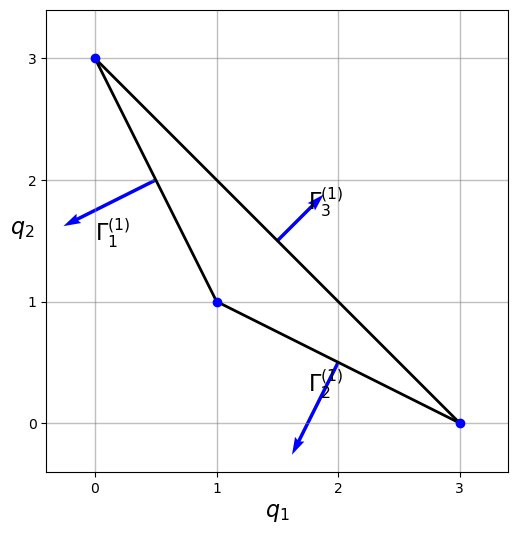

In [49]:
ax = NPimage(C,S,withNormals=True)
AddEdgeLabel(ax,S,C,normlst,1,r'$\Gamma_1^{(1)}$')
AddEdgeLabel(ax,S,C,normlst,2,r'$\Gamma_2^{(1)}$')
AddEdgeLabel(ax,S,C,normlst,0,r'$\Gamma_3^{(1)}$')
#plt.savefig("NPwNormals.png",dpi=300,bbox_inches='tight')
plt.show()

Вычисляем укороченные уравнения и решаем их

In [50]:
treqlst = [GetTrunc(f,C,k,x) for k in range(3)]
[treq.args for treq in treqlst]

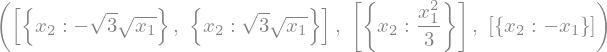

In [51]:
Soltr1=solve(treqlst[1].args[2],x[1],dict=True)
Soltr2=solve(treqlst[2].args[1],x[1],dict=True)
Soltr3=solve(treqlst[0].args[0],x[1],dict=True)
Soltr1,Soltr2,Soltr3

Попробуем визуализировать полученные решения и сравним их с точными, найденными численно

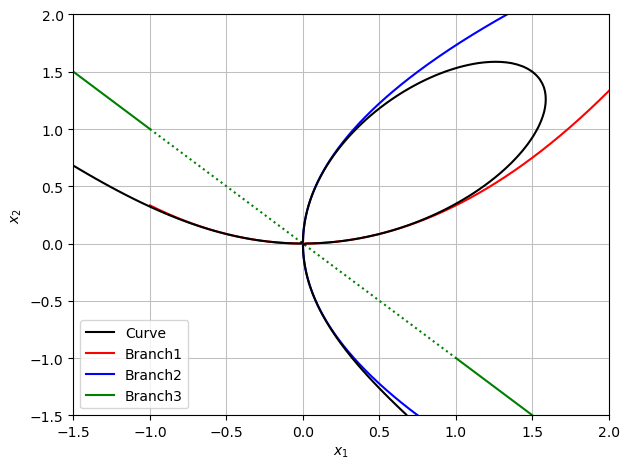

In [113]:
diap = [(0,2),(-1.5,2),(-1.5,2)]
p2=plot((Soltr1[0][x[1]],(x[0],*diap[0])),(Soltr1[1][x[1]],(x[0],*diap[0])),line_color="blue",xlim=diap[1],ylim=diap[1],ylabel="$x_2$",label=("Branch2",""),show=False,backend=MB)
p1=plot((Soltr2[0][x[1]],(x[0],-1,2)),line_color="red",xlim=diap[1],ylim=diap[1],ylabel="$x_2$",label="Branch1",show=False,backend=MB)
p3=plot((Soltr3[0][x[1]],(x[0],-1.5,-1)),(Soltr3[0][x[1]],(x[0],1,1.5)),line_color="green",xlim=diap[1],ylim=diap[1],ylabel="$x_2$",label=("Branch3",""),show=False,backend=MB)
p4=plot((Soltr3[0][x[1]],(x[0],-1,1)),line_color="green",xlim=diap[1],ylim=diap[1],ylabel="$x_2$",label="",rendering_kw={"linestyle": ":"},show=False,backend=MB)
#         line_color="black",xlabel="$x_1$",ylabel="$x_2$",xlim=diap[1],ylim=diap[1],\
#         show=False,backend=MB)
p5=plot_implicit(Eq(f,0),(x[0],*diap[1]),(x[1],*diap[1]),color="black",xlabel="$x_1$",ylabel="$x_2$",show=False,label="Curve",backend=MB)
p_common = (p1 + p2 + p3 + p4 + p5)
#p_common.save("DescartFolium_Branches.png",dpi=300,bbox_inches='tight')
p_common.show()

Находим следующий член разложения для решения, соответствующего грани 2

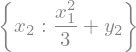

In [107]:
Sol2 = Soltr2[0][x[1]]
Sol2
y = symbols("y1:3",real=True)
Subs2 = {x[1]:Sol2+y[1]}
Subs2

Выполняем подстановку в исходный многочлен и раскрываем скобки

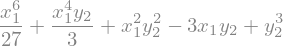

In [55]:
g=f.subs(Subs2).expand()
g

Повторяем вычисления носителя и многоугольника Ньютона многочлена $g(x_1,y_2)$

In [56]:
S1,C1 = SCH(g,(x[0],y[1]))
normlst1 = Normlst(C1)
[(i,normal) for i,normal in enumerate(normlst1)]

[(0, array([1, 2], dtype=int32)),
 (1, array([-2, -1], dtype=int32)),
 (2, array([-1, -5], dtype=int32))]

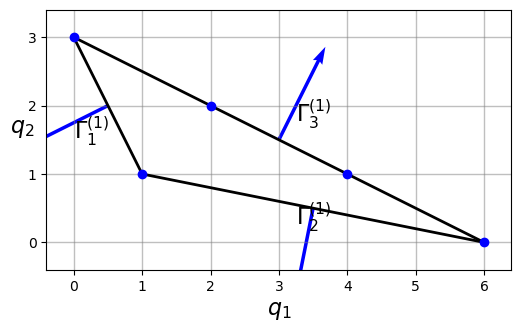

In [57]:
ax1 = NPimage(C1,S1,withNormals=True)
AddEdgeLabel(ax1,S1,C1,normlst,1,r'$\Gamma_1^{(1)}$')
AddEdgeLabel(ax1,S1,C1,normlst,2,r'$\Gamma_2^{(1)}$')
AddEdgeLabel(ax1,S1,C1,normlst,0,r'$\Gamma_3^{(1)}$')
#plt.savefig("fig1.pdf",dpi=300,bbox_inches='tight')
plt.show()

Из трех граней выбираем только ту, наклон которой больше, чем у предыдущей. Здесь это грань $\Gamma_2^{(1)}$.

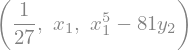

In [58]:
treq1lst = [GetTrunc(g,C1,k,(x[0],y[1])) for k in range(3)]
treq1lst[2].args

Решаем полученное укороченное уранвние и получаем следующий член разложения

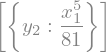

In [59]:
Soltr1eq1=solve(treq1lst[2].args[2],y[1],dict=True)
Soltr1eq1

Получаем следующий порядок разложения решения и проверяем его точность. Для этого подставляем полученное решение в уравнение кривой и раскладываем его в ряд до соответствующего порядка.

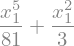

In [61]:
Sol2_1 = Subs2[x[1]].subs(Soltr1eq1[0])
Sol2_1

In [68]:
series(f.subs(x[1],Sol2_1),x[0],0,9).removeO()

Для грани $\Gamma_1^{(1)}$ с нормалью $[-2,-1]$ разложение получается по дробным степеням $x_1$.
Чтобы продолжать вычисления в кольце многочленов, выполним подстановку

In [72]:
t = symbols("t",real=True)
Subs_x1 = {x[0]:t**abs(normlst[1][0])}
Subs_x1

In [73]:
f_new = f.subs(Subs_x1)
f_new
f1tr_new = treqlst[1].subs(Subs_x1)
f1tr_new

Теперь получаем решение с целыми показателями степеней

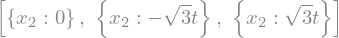

In [20]:
Soltr1_new = solve(f1tr_new,x[1],dict=True)
Soltr1_new

Дальнейшие вычисления проделайте самостоятельно! 

Также рекомендуется найти следующий член разложения для грани $\Gamma_3^{(1)}$, а затем построить полученные ветви разложений на плоскости $(x_1,x_2)$.

---------------

## Степенное преобразование

Укороченное уравнение не всегда устроено просто, как в примере. Но в силу его квазиоднородности, можно использовать степенное преобразование.
Оно позволяет многочлен от двух переменных преобразовать в многочлен от одной переменной, затем найти его корни и получить начальный член разложения

Построим степенное преобразование соответствующее нормали 1

In [21]:
normlst[1]

array([-2, -1], dtype=int32)

Воспользуемся процедурой UniMod1, которая получает два целых числа. Поскольку координаты вектора отрицательны, используем их абсолютные величины. Для построения степенного преобразования понадобится обратная матрица.

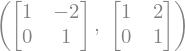

In [34]:
alpha1 = UniMod1(*(np.abs(normlst[1])))
#alpha2 = UniMod2(*(-normlst[1]))
alpha1,alpha1.inv()#,alpha2

In [35]:
z = symbols("z1:3",real=True)
Subs_x = PowTrans(alpha1.inv(),x,z)
Subs_x

Вычислим укороченное уравнение, соответствующее ребру 1, в новых переменных. Его нетривиальный множитель есть уравнение от одной переменной.

In [36]:
treq1_z = treqlst[1].args[2].subs(Subs_x).factor()
treq1_z

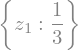

In [39]:
Sol_treq1_z = solve(treq1_z,z[0],dict=True)[0]
Sol_treq1_z

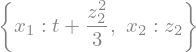

In [42]:
Subs_z = copy(Subs_x)
Subs_z.update({x[0]:Subs_x[x[0]].subs(Sol_treq1_z)+t})
Subs_z

# Разложение в окрестности простой точки 

Все решения уравнения $f(X)=0$ вблизи простой точки $X^0=(x_1^0,x_2^0)$ разлагаются в ряд	
$x_i=x_i^0+\sum\limits_{k=1}^\infty b_k(x_j-x_j^0)^k$, где $b_k$ - постоянные, а $ j=3-i $.

Коэффициенты ряда $b_k=\dfrac1{k!}\dfrac{\partial^k f}{\partial x_j^k}(X^0)$ можно вычислить с помощью процедуры неявного дифференцирования.

Найдем разложение кривой в вершине "лепестка". Эта ненулевая точка лежит на пересечении кривой $f(X)=0$ и биссектрисы I-III квадрантов $x_2=x_1$.

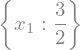

In [78]:
f_x2eqx1 = f.subs(x[1],x[0]).factor().args[-1]
f_x2eqx1
Subs_rp = solve(f_x2eqx1,x[0],dict=True)[0]
Subs_rp 

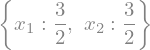

In [79]:
Subs_rp.update({x[1]:Sol_x1[x[0]]})#{x[0]:Rational(3,2),x[1]:Rational(3,2)}
Subs_rp

Вычислим разложение до фиксированного порядка Nexpand.

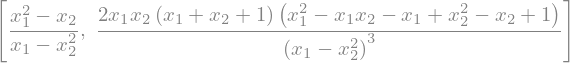

In [80]:
Nexpand=6
Dflst=[idiff(f,x[1],x[0],n).factor() for n in range(1,Nexpand)]
Dflst[:2]

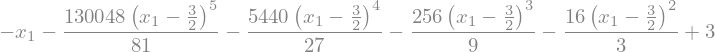

In [81]:
f_expand = sum([Subs_rp[x[1]]]+[t.subs(Subs_rp)*(x[0]-Subs_rp[x[0]])**i/factorial(i) for i,t in enumerate(Dflst,1)])
f_expand

Выполним проверку полученного разложения, подставив ряд в уравнение кривой и отбросив члены высокого порядка малости.

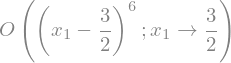

In [82]:
series(f.subs(x[1],f_expand),x[0],Rational(3,2),Nexpand)

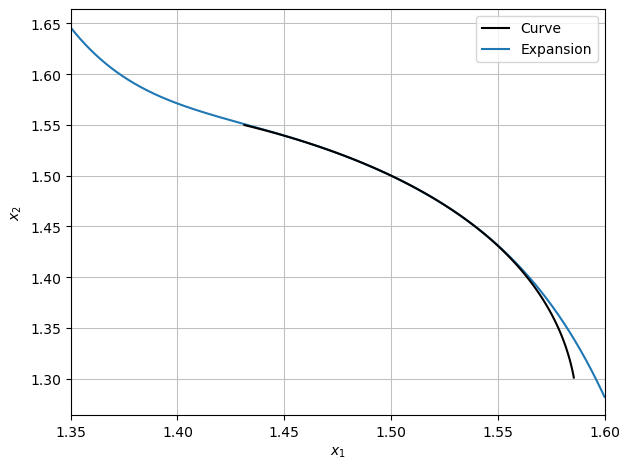

In [122]:
p_simple = plot(f_expand,(x[0],1.35,1.6),ylabel="$x_2$",show=False,label="Expansion")
p_curve = plot_implicit(Eq(f,0),(x[0],1.35,1.6),(x[1],1.3,1.55),color="black",xlabel="$x_1$",ylabel="$x_2$",show=False,label="Curve",backend=MB)
(p_simple+p_curve).show()